# <b> Palmer Penguins Classification  </b>

Last Update: 28/12/2022

PyCaret Version: 2.2.3

Author: [Aurimas Aleksandras Nausėdas](https://github.com/aurimas13)


# <b> Installation </b>
    

In [2]:
!pip install pycaret==2.2.3

In [3]:
from pycaret.utils import version
print('Confirm PyCaret version is 2.2.X?')
print('PyCaret Version: ', version())

Confirm PyCaret version is 2.2.X?
PyCaret Version:  2.2.3


# <b>Importing the Libraries

In [6]:
# Import libraries for data processing.
import numpy as np
import pandas as pd
import warnings 
import time
warnings.filterwarnings('ignore')

# Import libraries for visualisations and set defauult values
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])

from sklearn import set_config
set_config(display='text')

# <b>Loading the Data

The data used in this project is the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).


In [7]:
# Load the data
data = pd.read_csv('Data/penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
3,Adelie,Torgersen,36.7,19.3,193,3450,Female
4,Adelie,Torgersen,39.3,20.6,190,3650,Male


### 4 numerical features:
- Bill length (mm) 
- Bill depth (mm)
- Flipper length (mm)
- Body mass (g)

### 3 categorical features:
- Sex (Male/Female)
- Island (Biscoe/Dream/Torgersen)
- Species 

You can find the cleaned CSV file in my [GitHub](https://github.com/aurimas13/CodeAcademy-AI-Course/blob/main/Examples/Data/penguins.csv).

In [8]:
# View the data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [10]:
# Look for nulls and duplicated values
data.isnull().sum()
data.duplicated().sum()

0

# <b> Setup


In [11]:
from pycaret.classification import *

In [12]:
clf = setup(
    data=data,
    target='sex',
    train_size=0.8,
    normalize=True,
    session_id=123
)
    

,Description,Value
0,session_id,123
1,Target,sex
2,Target Type,Binary
3,Label Encoded,"Female: 0, Male: 1"
4,Original Data,"(333, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


# <b> Compare Models


In [13]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9359,0.9801,0.9295,0.9456,0.9346,0.8722,0.8769,0.0060
et,Extra Trees Classifier,0.9168,0.9797,0.9064,0.9276,0.9143,0.8340,0.8380,0.0390
lr,Logistic Regression,0.9319,0.9744,0.9288,0.9379,0.9302,0.8642,0.8691,0.3730
lightgbm,Light Gradient Boosting Machine,0.9165,0.9742,0.9064,0.9280,0.9146,0.8335,0.8373,0.0110
catboost,CatBoost Classifier,0.9056,0.9729,0.8987,0.9120,0.9029,0.8115,0.8151,0.1060
rf,Random Forest Classifier,0.9132,0.9709,0.8987,0.9251,0.9095,0.8265,0.8303,0.0470
xgboost,Extreme Gradient Boosting,0.8939,0.9676,0.8910,0.9003,0.8911,0.7883,0.7953,0.0270
knn,K Neighbors Classifier,0.9281,0.9657,0.9301,0.9272,0.9270,0.8565,0.8592,0.2390
gbc,Gradient Boosting Classifier,0.8870,0.9636,0.8603,0.9111,0.8800,0.7740,0.7815,0.0140
ada,Ada Boost Classifier,0.9020,0.9586,0.8994,0.9079,0.8995,0.8036,0.8100,0.0160


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

# <b> Create Model
    


In [14]:
help(create_model)

Help on function create_model in module pycaret.classification:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, **kwargs) -> Any
    This function trains and evaluates the performance of a given estimator 
    using cross validation. The output of this function is a score grid with 
    CV scores by fold. Metrics evaluated during CV can be accessed using the 
    ``get_metrics`` function. Custom metrics can be added or removed using 
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    
   

In [15]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9259,0.9973,0.8462,1.0000,0.9167,0.8508,0.8605
1,0.9630,0.9890,0.9231,1.0000,0.9600,0.9256,0.9282
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.9835,0.8462,0.9167,0.8800,0.7769,0.7790
4,0.9259,0.9890,0.9231,0.9231,0.9231,0.8516,0.8516
5,0.9259,0.9423,0.9231,0.9231,0.9231,0.8516,0.8516
6,0.9231,0.9882,0.8462,1.0000,0.9167,0.8462,0.8563
7,0.9231,0.9675,0.9231,0.9231,0.9231,0.8462,0.8462
8,0.9615,1.0000,1.0000,0.9231,0.9600,0.9231,0.9258
9,0.7308,0.9405,0.8333,0.6667,0.7407,0.4678,0.4805


In [16]:
tuned_et = tune_model(et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9630,1.0000,0.9231,1.0000,0.9600,0.9256,0.9282
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.9725,0.8462,0.9167,0.8800,0.7769,0.7790
4,0.9259,0.9945,0.9231,0.9231,0.9231,0.8516,0.8516
5,0.9259,0.9396,1.0000,0.8667,0.9286,0.8525,0.8619
6,0.9615,1.0000,0.9231,1.0000,0.9600,0.9231,0.9258
7,0.9231,1.0000,0.8462,1.0000,0.9167,0.8462,0.8563
8,0.9231,0.9940,1.0000,0.8571,0.9231,0.8471,0.8571
9,0.7692,0.8810,0.8333,0.7143,0.7692,0.5412,0.5476


In [17]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

# <b> Plot the Model


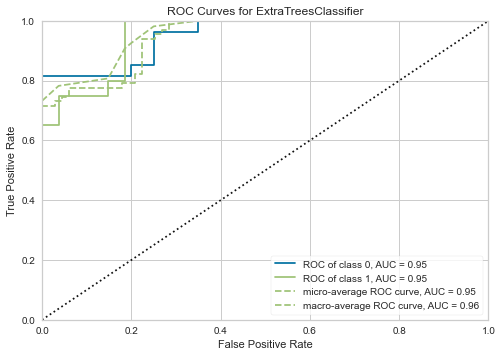

In [18]:
plot_model(tuned_et)

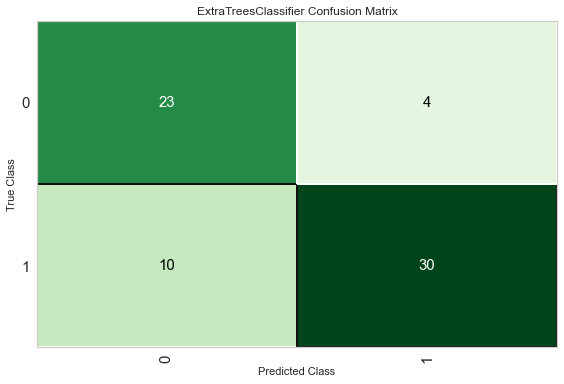

In [19]:
plot_model(tuned_et, plot = 'confusion_matrix')

+ Details of Confusion Matrix Metrics (TP, TN, FP, FN) found under Examples folder on my Github as Machine_Learning_with_Python_session_2.ipynb file.

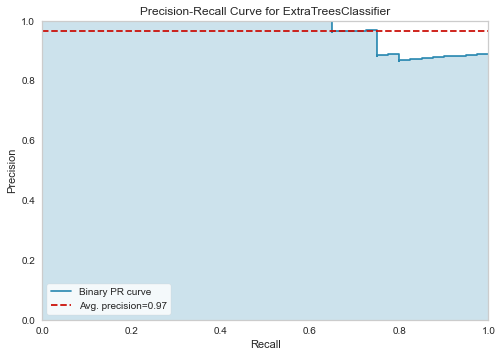

In [20]:
# Precision Recall Curve
plot_model(tuned_et, plot = 'pr')

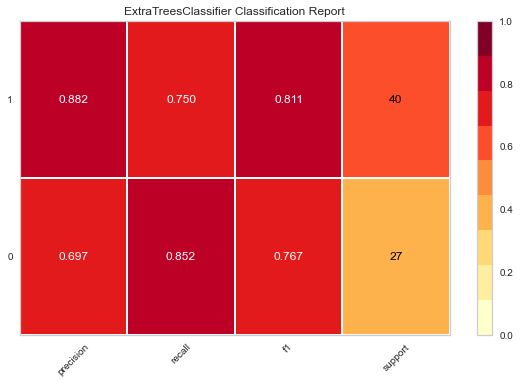

In [21]:
plot_model(tuned_et, plot = 'class_report')

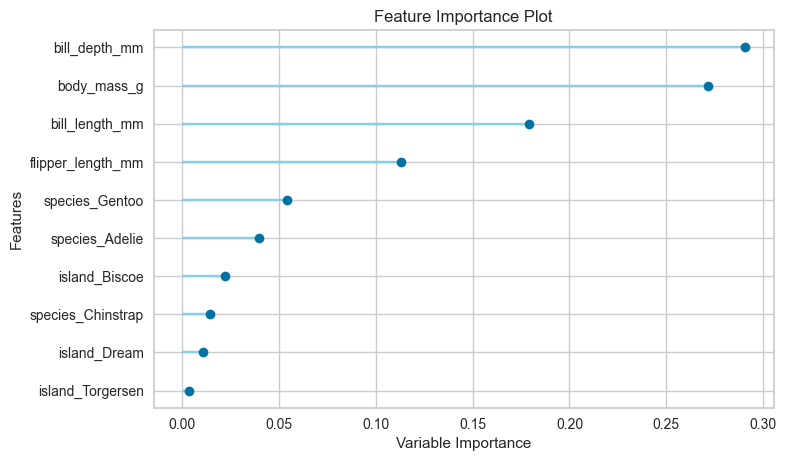

In [22]:
plot_model(tuned_et, plot='feature')

# <b> Evaluate Model


In [23]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# <b> Interpret the Model


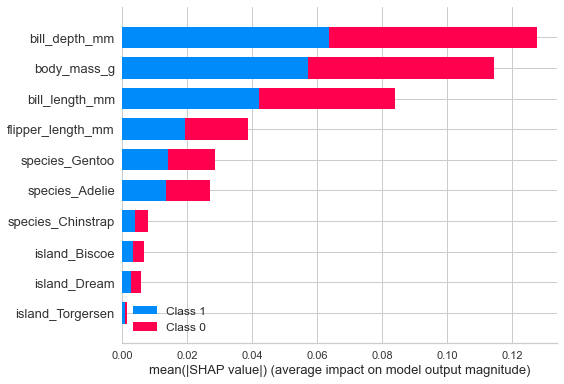

In [24]:
# Interpret the model using SHAP values
interpret_model(tuned_et)

# <b> Predict and Finalize model


In [27]:
# Make predictions on test set
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7910,0.9519,0.7500,0.8824,0.8108,0.5809,0.5905


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex,Label,Score
0,0.309757,1.609127,-0.677099,0.526910,1.0,0.0,0.0,1.0,0.0,0.0,Male,Male,0.6987
1,0.272575,-1.341004,0.754605,0.776801,0.0,0.0,1.0,1.0,0.0,0.0,Female,Female,0.7128
2,1.220717,1.246831,0.038753,-0.160292,0.0,1.0,0.0,0.0,1.0,0.0,Male,Male,0.7162
3,0.662987,-0.202357,-0.104418,-0.347711,0.0,1.0,0.0,0.0,1.0,0.0,Female,Female,0.5860
4,0.960443,-1.237491,1.398872,1.214111,0.0,0.0,1.0,1.0,0.0,0.0,Female,Male,0.5160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.402712,-1.082221,1.040946,1.151639,0.0,0.0,1.0,1.0,0.0,0.0,Male,Female,0.5509
63,0.886079,-1.599788,0.683020,0.339491,0.0,0.0,1.0,1.0,0.0,0.0,Female,Female,0.6892
64,-0.489657,2.023181,-0.390759,0.277018,1.0,0.0,0.0,1.0,0.0,0.0,Male,Male,0.7161
65,-0.880068,2.023181,-0.319173,-0.035347,1.0,0.0,0.0,0.0,1.0,0.0,Male,Male,0.6915


In [28]:
finalize_model(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [29]:
# Save the model
save_model(tuned_et, 'et_model_28122022')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='sex',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced_subsample',
                                       criterion='gini', max_depth=6,
                                       max_features='log2',